📊 CHARGEMENT ET EXPLORATION DES DONNÉES
✅ Dimensions initiales du dataset : (76000, 16)
✅ Colonnes disponibles : ['Date', 'Store ID', 'Product ID', 'Category', 'Region', 'Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount', 'Weather Condition', 'Promotion', 'Competitor Pricing', 'Seasonality', 'Epidemic', 'Demand']

🔍 INFORMATIONS GÉNÉRALES :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null

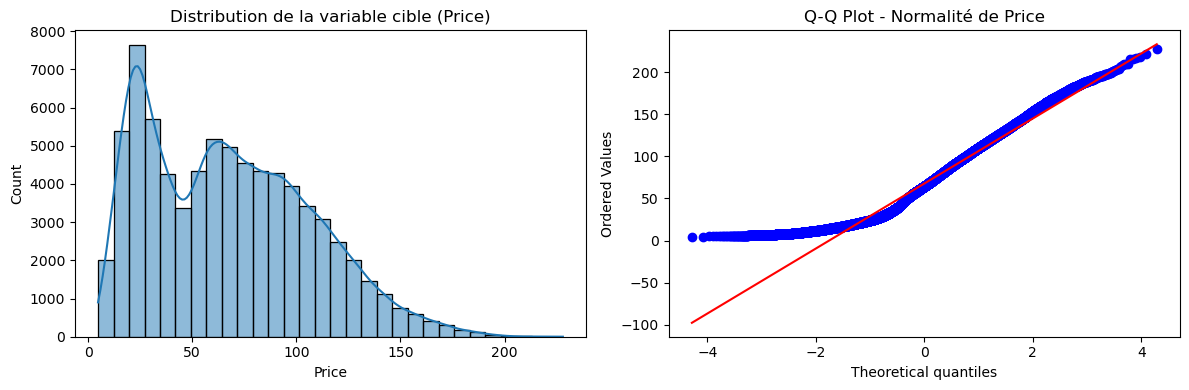


📊 Test de normalité (Shapiro-Wilk) : p-value = 0.0000
⚠️ La distribution n'est pas normale (considérer une transformation)

🔍 SÉPARATION DES VARIABLES
📊 Variables catégorielles : ['Category', 'Region', 'Weather Condition', 'Seasonality']
🔢 Variables numériques : ['Inventory Level', 'Units Sold', 'Units Ordered', 'Discount', 'Competitor Pricing']
🔘 Variables binaires : ['Promotion', 'Epidemic']

🔍 DÉTECTION ET TRAITEMENT DES OUTLIERS
📊 Outliers détectés par variable :
   Inventory Level: 2759 outliers (3.6%)
   Units Sold: 1411 outliers (1.9%)
   Units Ordered: 7524 outliers (9.9%)
   Discount: 12413 outliers (16.3%)
   Competitor Pricing: 185 outliers (0.2%)
   Price: 70 outliers (0.1%)
🔧 Inventory Level: 7517 valeurs capées
🔧 Units Sold: 7406 valeurs capées
🔧 Units Ordered: 3787 valeurs capées
🔧 Competitor Pricing: 7599 valeurs capées

🔧 ENCODAGE DES VARIABLES CATÉGORIELLES
✅ Encodage One-Hot effectué pour 4 variables

🔧 CRÉATION DE VARIABLES DÉRIVÉES
✅ Variable Sales_Rate créée
✅ Va

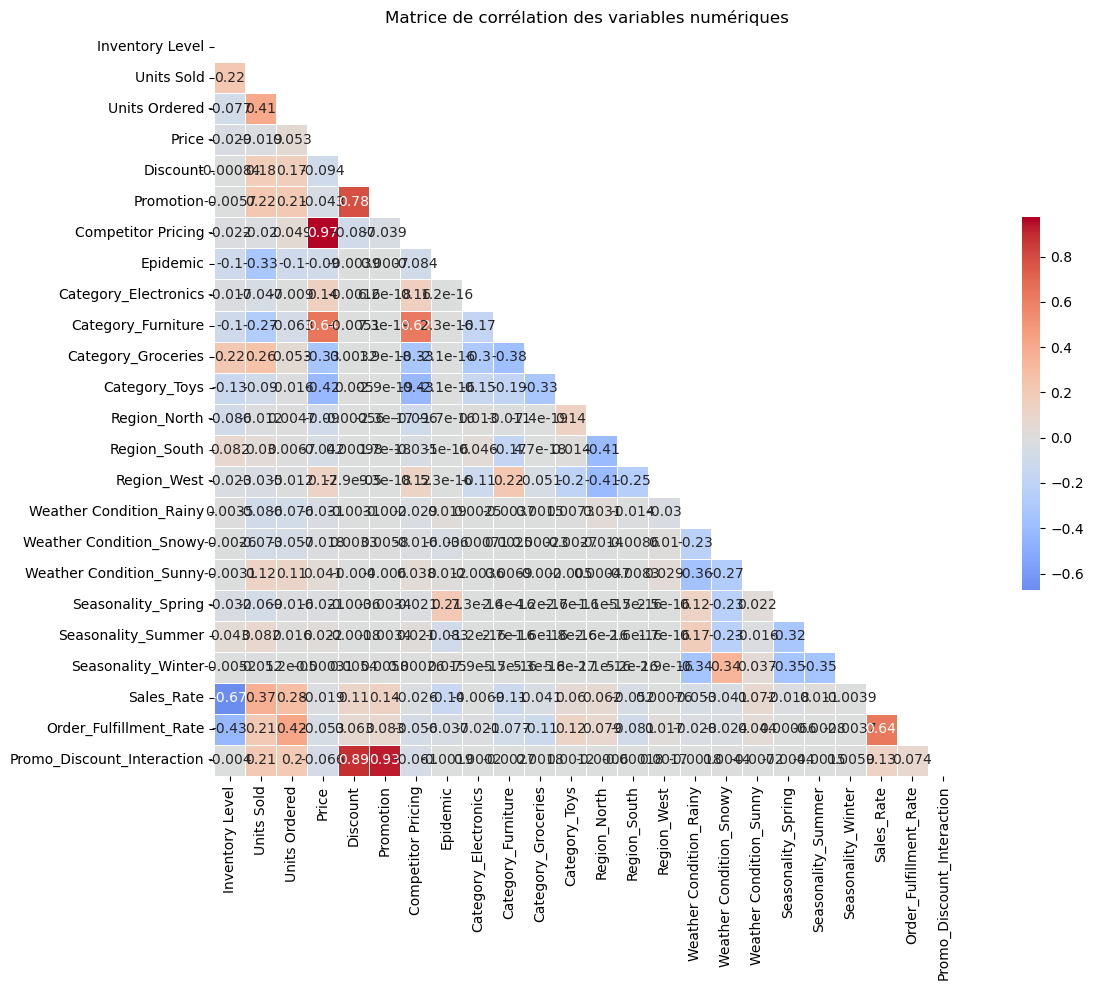


📊 Corrélation avec la variable cible :
Price                   1.000000
Competitor Pricing      0.973106
Category_Furniture      0.639896
Category_Toys           0.418178
Category_Groceries      0.333175
Category_Electronics    0.144850
Region_West             0.122995
Discount                0.094136
Region_North            0.090486
Epidemic                0.089658
Name: Price, dtype: float64

⚠️ Paires de variables fortement corrélées (>0.8) :
   Price - Competitor Pricing: 0.973
   Discount - Promo_Discount_Interaction: 0.887
   Promotion - Promo_Discount_Interaction: 0.931

🔀 SÉPARATION DES DONNÉES
📊 Dimensions finales :
   Features (X): (76000, 23)
   Target (y): (76000,)
   Nom des features: ['Inventory Level', 'Units Sold', 'Units Ordered', 'Discount', 'Promotion', 'Competitor Pricing', 'Epidemic', 'Category_Electronics', 'Category_Furniture', 'Category_Groceries', 'Category_Toys', 'Region_North', 'Region_South', 'Region_West', 'Weather Condition_Rainy', 'Weather Condition_Snow

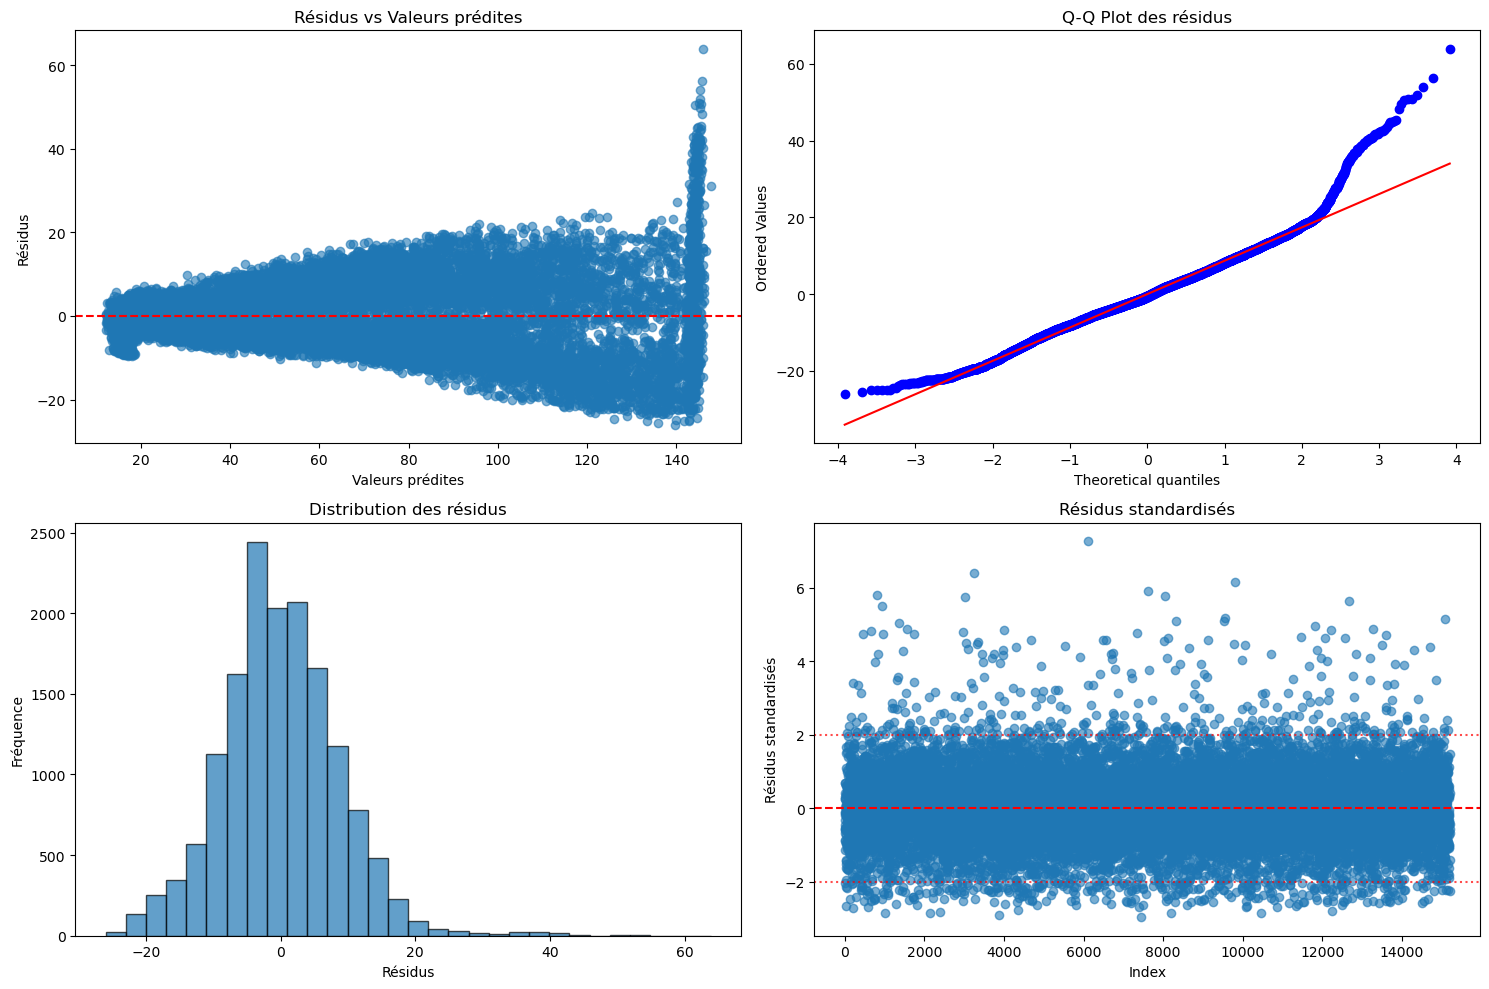

✅ Test de normalité des résidus (Shapiro-Wilk): p-value = 0.0000

📊 5. IMPORTANCE DES VARIABLES
✅ Top 10 des variables les plus importantes:
                   Feature  Coefficient  Abs_Coefficient
5       Competitor Pricing    35.935706        35.935706
8       Category_Furniture     2.851750         2.851750
3                 Discount    -0.895031         0.895031
1               Units Sold     0.726760         0.726760
9       Category_Groceries    -0.627768         0.627768
10           Category_Toys    -0.561439         0.561439
2            Units Ordered     0.386749         0.386749
21  Order_Fulfillment_Rate    -0.371900         0.371900
7     Category_Electronics     0.361350         0.361350
20              Sales_Rate     0.339491         0.339491


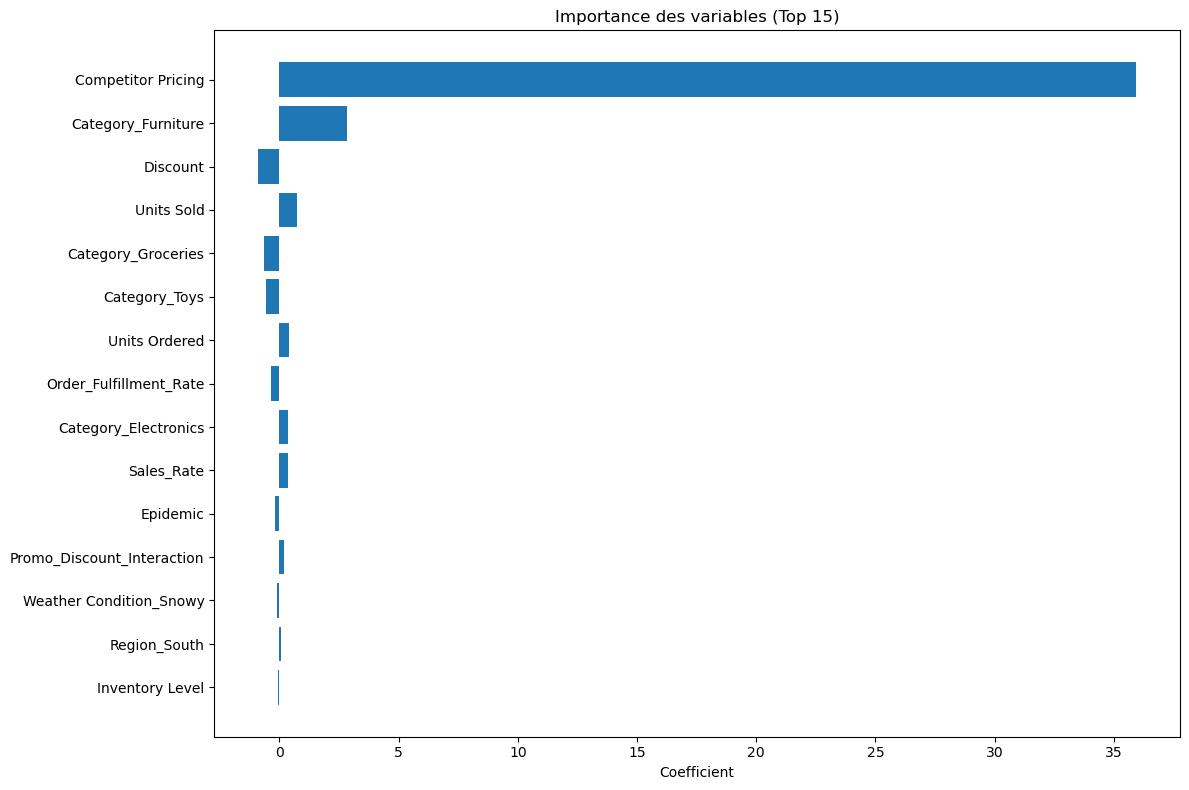


📈 6. COURBE D'APPRENTISSAGE


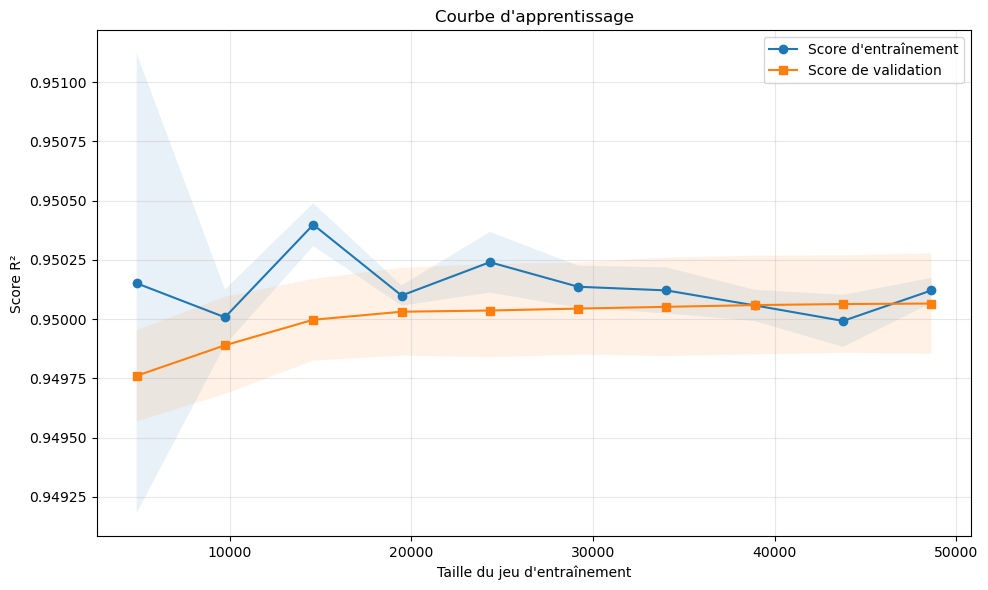


📋 RAPPORT FINAL
✅ Modèle final: LinearRegression{'fit_intercept': True, 'positive': False}
✅ Nombre de features: 23
✅ Taille du jeu d'entraînement: 60800
✅ Taille du jeu de test: 15200
✅ Score R² sur le test: 0.9502
✅ MSE sur le test: 77.4049
✅ MAE sur le test: 6.7557
✅ Score CV moyen: 0.9501 (±0.0007)
🎉 Excellente performance du modèle!
⚠️ Les résidus ne suivent pas une distribution normale

🔧 Recommandations pour l'amélioration:
   - Considérer d'autres algorithmes (Random Forest, XGBoost)
   - Tester des transformations de variables (log, polynomial)
   - Collecter plus de données si possible
   - Vérifier la qualité des données d'entrée

✅ ANALYSE TERMINÉE
✅ Modèle et scaler sauvegardés (model.pkl et scaler.pkl)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# 1. CHARGEMENT ET EXPLORATION INITIALE DES DONNÉES
# =============================================================================

print("📊 CHARGEMENT ET EXPLORATION DES DONNÉES")
print("="*50)

# Chargement des données
df = pd.read_csv('sales_data.csv')
print(f"✅ Dimensions initiales du dataset : {df.shape}")
print(f"✅ Colonnes disponibles : {list(df.columns)}")

# Exploration initiale
print("\n🔍 INFORMATIONS GÉNÉRALES :")
print(df.info())
print("\n📈 STATISTIQUES DESCRIPTIVES :")
print(df.describe())

# =============================================================================
# 2. GESTION DES VALEURS MANQUANTES
# =============================================================================

print("\n🔍 GESTION DES VALEURS MANQUANTES")
print("="*50)

# Vérification des valeurs manquantes
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Colonne': missing_data.index,
    'Valeurs_manquantes': missing_data.values,
    'Pourcentage': missing_percentage.values
}).sort_values('Pourcentage', ascending=False)

print("📋 Valeurs manquantes par colonne :")
print(missing_df[missing_df['Valeurs_manquantes'] > 0])

# Traitement des valeurs manquantes
if missing_data.sum() > 0:
    print("\n🧹 Traitement des valeurs manquantes...")
    # Pour les variables numériques : médiane
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
    
    # Pour les variables catégorielles : mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)
    
    print("✅ Valeurs manquantes traitées")
else:
    print("✅ Aucune valeur manquante détectée")

# =============================================================================
# 3. PRÉPARATION DES DONNÉES
# =============================================================================

print("\n🔧 PRÉPARATION DES DONNÉES")
print("="*50)

# Définition de la variable cible
target = 'Price'
print(f"🎯 Variable cible : {target}")

# Suppression des colonnes non pertinentes
cols_to_drop = ['Date', 'Store ID', 'Product ID', 'Demand']
df = df.drop(columns=cols_to_drop, errors='ignore')
print(f"🗑️ Colonnes supprimées : {cols_to_drop}")

# Vérification des types de données
print("\n📊 Types de données après nettoyage :")
print(df.dtypes)

# Distribution de la variable cible
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df[target], kde=True, bins=30)
plt.title('Distribution de la variable cible (Price)')
plt.xlabel('Price')

plt.subplot(1, 2, 2)
stats.probplot(df[target], dist="norm", plot=plt)
plt.title('Q-Q Plot - Normalité de Price')
plt.tight_layout()
plt.show()

# Test de normalité
shapiro_stat, shapiro_p = stats.shapiro(df[target].sample(min(5000, len(df))))
print(f"\n📊 Test de normalité (Shapiro-Wilk) : p-value = {shapiro_p:.4f}")
if shapiro_p < 0.05:
    print("⚠️ La distribution n'est pas normale (considérer une transformation)")
else:
    print("✅ La distribution est approximativement normale")

# =============================================================================
# 4. SÉPARATION DES VARIABLES
# =============================================================================

print("\n🔍 SÉPARATION DES VARIABLES")
print("="*50)

# Identification automatique des types de variables
categorical_cols = []
numerical_cols = []
binary_cols = []

for col in df.columns:
    if col != target:
        if df[col].dtype == 'object':
            categorical_cols.append(col)
        elif df[col].nunique() == 2:
            binary_cols.append(col)
        else:
            numerical_cols.append(col)

print(f"📊 Variables catégorielles : {categorical_cols}")
print(f"🔢 Variables numériques : {numerical_cols}")
print(f"🔘 Variables binaires : {binary_cols}")

# =============================================================================
# 5. DÉTECTION ET TRAITEMENT DES OUTLIERS
# =============================================================================

print("\n🔍 DÉTECTION ET TRAITEMENT DES OUTLIERS")
print("="*50)

def detect_outliers_iqr(dataframe, columns):
    """Détecte les outliers avec la méthode IQR"""
    outliers_info = {}
    
    for col in columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]
        outliers_info[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(dataframe)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    
    return outliers_info

# Détection des outliers
outliers_info = detect_outliers_iqr(df, numerical_cols + [target])

print("📊 Outliers détectés par variable :")
for col, info in outliers_info.items():
    print(f"   {col}: {info['count']} outliers ({info['percentage']:.1f}%)")

# Traitement conservateur des outliers (cap à 95e percentile)
def cap_outliers(dataframe, columns, percentile=95):
    """Cap les outliers au percentile spécifié"""
    df_capped = dataframe.copy()
    
    for col in columns:
        lower_cap = np.percentile(df_capped[col], 100 - percentile)
        upper_cap = np.percentile(df_capped[col], percentile)
        
        before_count = len(df_capped[df_capped[col] > upper_cap]) + len(df_capped[df_capped[col] < lower_cap])
        
        df_capped[col] = np.clip(df_capped[col], lower_cap, upper_cap)
        
        if before_count > 0:
            print(f"🔧 {col}: {before_count} valeurs capées")
    
    return df_capped

# Application du capping pour les variables numériques (pas la target)
df_processed = cap_outliers(df, numerical_cols, percentile=95)

# =============================================================================
# 6. ENCODAGE DES VARIABLES CATÉGORIELLES
# =============================================================================

print("\n🔧 ENCODAGE DES VARIABLES CATÉGORIELLES")
print("="*50)

df_encoded = df_processed.copy()

# One-Hot Encoding pour les variables catégorielles
if categorical_cols:
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_cat = encoder.fit_transform(df_encoded[categorical_cols])
    encoded_df = pd.DataFrame(
        encoded_cat, 
        columns=encoder.get_feature_names_out(categorical_cols),
        index=df_encoded.index
    )
    
    # Remplacement des colonnes originales
    df_encoded = pd.concat([df_encoded.drop(columns=categorical_cols), encoded_df], axis=1)
    print(f"✅ Encodage One-Hot effectué pour {len(categorical_cols)} variables")

# Traitement des variables binaires
for col in binary_cols:
    if df_encoded[col].dtype == 'object':
        unique_vals = df_encoded[col].unique()
        if len(unique_vals) == 2:
            # Mapping automatique
            df_encoded[col] = df_encoded[col].map({unique_vals[0]: 0, unique_vals[1]: 1})
            print(f"✅ {col}: {unique_vals[0]} -> 0, {unique_vals[1]} -> 1")

# =============================================================================
# 7. CRÉATION DE VARIABLES DÉRIVÉES (AVEC PRUDENCE)
# =============================================================================

print("\n🔧 CRÉATION DE VARIABLES DÉRIVÉES")
print("="*50)

# Vérification de la disponibilité des colonnes nécessaires
required_cols = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Discount']
available_cols = [col for col in required_cols if col in df_encoded.columns]

if 'Inventory Level' in df_encoded.columns and 'Units Sold' in df_encoded.columns:
    # Éviter la division par zéro
    df_encoded['Sales_Rate'] = np.where(
        df_encoded['Inventory Level'] > 0,
        df_encoded['Units Sold'] / df_encoded['Inventory Level'],
        0
    )
    print("✅ Variable Sales_Rate créée")

if 'Units Ordered' in df_encoded.columns and 'Units Sold' in df_encoded.columns:
    df_encoded['Order_Fulfillment_Rate'] = np.where(
        df_encoded['Units Ordered'] > 0,
        df_encoded['Units Sold'] / df_encoded['Units Ordered'],
        0
    )
    print("✅ Variable Order_Fulfillment_Rate créée")

if 'Promotion' in df_encoded.columns and 'Discount' in df_encoded.columns:
    df_encoded['Promo_Discount_Interaction'] = df_encoded['Promotion'] * df_encoded['Discount']
    print("✅ Variable Promo_Discount_Interaction créée")

# =============================================================================
# 8. ANALYSE DE CORRÉLATION ET SÉLECTION DE VARIABLES
# =============================================================================

print("\n🔍 ANALYSE DE CORRÉLATION")
print("="*50)

# Matrice de corrélation
numeric_features = df_encoded.select_dtypes(include=[np.number]).columns
correlation_matrix = df_encoded[numeric_features].corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, mask=mask)
plt.title('Matrice de corrélation des variables numériques')
plt.tight_layout()
plt.show()

# Identification des variables fortement corrélées avec la target
target_corr = correlation_matrix[target].abs().sort_values(ascending=False)
print("\n📊 Corrélation avec la variable cible :")
print(target_corr.head(10))

# Détection de multicolinéarité
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    print("\n⚠️ Paires de variables fortement corrélées (>0.8) :")
    for pair in high_corr_pairs:
        print(f"   {pair[0]} - {pair[1]}: {pair[2]:.3f}")

# =============================================================================
# 9. SÉPARATION DES DONNÉES (TRAIN/TEST)
# =============================================================================

print("\n🔀 SÉPARATION DES DONNÉES")
print("="*50)

# Préparation des variables X et y
y = df_encoded[target]
X = df_encoded.drop(columns=[target])

print(f"📊 Dimensions finales :")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")
print(f"   Nom des features: {list(X.columns)}")

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)

print(f"\n✅ Séparation effectuée :")
print(f"   Train: {X_train.shape[0]} échantillons")
print(f"   Test: {X_test.shape[0]} échantillons")

# =============================================================================
# 10. STANDARDISATION DES DONNÉES
# =============================================================================

print("\n🔧 STANDARDISATION DES DONNÉES")
print("="*50)

# Identification des colonnes numériques à standardiser
numeric_cols_to_scale = X_train.select_dtypes(include=[np.number]).columns.tolist()
print(f"📊 Colonnes à standardiser : {numeric_cols_to_scale}")

# Standardisation (FIT sur train, TRANSFORM sur test)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

if numeric_cols_to_scale:
    X_train_scaled[numeric_cols_to_scale] = scaler.fit_transform(X_train[numeric_cols_to_scale])
    X_test_scaled[numeric_cols_to_scale] = scaler.transform(X_test[numeric_cols_to_scale])
    print("✅ Standardisation effectuée")

# =============================================================================
# 11. MODÉLISATION ET OPTIMISATION
# =============================================================================

print("\n🤖 MODÉLISATION ET OPTIMISATION")
print("="*50)

# Modèle de base
print("\n📊 1. MODÈLE DE BASE (LinearRegression)")
base_model = LinearRegression()
base_model.fit(X_train_scaled, y_train)

# Prédictions
y_pred_train = base_model.predict(X_train_scaled)
y_pred_test = base_model.predict(X_test_scaled)

# Métriques de base
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f"   Train R²: {train_r2:.4f}")
print(f"   Test R²: {test_r2:.4f}")
print(f"   Test MSE: {test_mse:.4f}")
print(f"   Test MAE: {test_mae:.4f}")

# Vérification du surapprentissage
if train_r2 - test_r2 > 0.1:
    print("⚠️ Possible surapprentissage détecté")
else:
    print("✅ Pas de surapprentissage apparent")

# =============================================================================
# 12. OPTIMISATION PAR GRIDSEARCH
# =============================================================================

print("\n🔧 2. OPTIMISATION PAR GRIDSEARCH")

# Paramètres à tester
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train_scaled, y_train)

print(f"✅ Meilleurs paramètres: {grid_search.best_params_}")
print(f"✅ Meilleur score CV: {grid_search.best_score_:.4f}")

# Évaluation du modèle optimisé
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
best_r2 = r2_score(y_test, y_pred_best)
best_mse = mean_squared_error(y_test, y_pred_best)

print(f"   Test R² (optimisé): {best_r2:.4f}")
print(f"   Test MSE (optimisé): {best_mse:.4f}")

# =============================================================================
# 13. VALIDATION CROISÉE
# =============================================================================

print("\n🔁 3. VALIDATION CROISÉE")

# K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=kfold, scoring='r2')

print(f"✅ Scores CV R²: {cv_scores}")
print(f"✅ Moyenne CV R²: {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")

# =============================================================================
# 14. ANALYSE DES RÉSIDUS
# =============================================================================

print("\n🔍 4. ANALYSE DES RÉSIDUS")

# Calcul des résidus
residuals = y_test - y_pred_best
standardized_residuals = residuals / np.sqrt(best_mse)

# Visualisation des résidus
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Résidus vs Valeurs prédites
axes[0, 0].scatter(y_pred_best, residuals, alpha=0.6)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Valeurs prédites')
axes[0, 0].set_ylabel('Résidus')
axes[0, 0].set_title('Résidus vs Valeurs prédites')

# 2. Q-Q plot des résidus
stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot des résidus')

# 3. Histogramme des résidus
axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Résidus')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].set_title('Distribution des résidus')

# 4. Résidus standardisés
axes[1, 1].scatter(range(len(standardized_residuals)), standardized_residuals, alpha=0.6)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].axhline(y=2, color='r', linestyle=':', alpha=0.7)
axes[1, 1].axhline(y=-2, color='r', linestyle=':', alpha=0.7)
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Résidus standardisés')
axes[1, 1].set_title('Résidus standardisés')

plt.tight_layout()
plt.show()

# Tests statistiques sur les résidus
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"✅ Test de normalité des résidus (Shapiro-Wilk): p-value = {shapiro_p:.4f}")

# =============================================================================
# 15. IMPORTANCE DES VARIABLES
# =============================================================================

print("\n📊 5. IMPORTANCE DES VARIABLES")

# Coefficients du modèle
feature_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': best_model.coef_,
    'Abs_Coefficient': np.abs(best_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("✅ Top 10 des variables les plus importantes:")
print(feature_importance.head(10))

# Visualisation
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Coefficient'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient')
plt.title('Importance des variables (Top 15)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# =============================================================================
# 16. COURBE D'APPRENTISSAGE
# =============================================================================

print("\n📈 6. COURBE D'APPRENTISSAGE")

# Calcul de la courbe d'apprentissage
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_scaled, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='r2', n_jobs=-1
)

# Moyennes et écart-types
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Score d\'entraînement', marker='o')
plt.plot(train_sizes, val_mean, label='Score de validation', marker='s')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Taille du jeu d\'entraînement')
plt.ylabel('Score R²')
plt.title('Courbe d\'apprentissage')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# 17. RAPPORT FINAL
# =============================================================================

print("\n📋 RAPPORT FINAL")
print("="*50)
print(f"✅ Modèle final: LinearRegression{grid_search.best_params_}")
print(f"✅ Nombre de features: {X_train_scaled.shape[1]}")
print(f"✅ Taille du jeu d'entraînement: {X_train_scaled.shape[0]}")
print(f"✅ Taille du jeu de test: {X_test_scaled.shape[0]}")
print(f"✅ Score R² sur le test: {best_r2:.4f}")
print(f"✅ MSE sur le test: {best_mse:.4f}")
print(f"✅ MAE sur le test: {mean_absolute_error(y_test, y_pred_best):.4f}")
print(f"✅ Score CV moyen: {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")

# Interprétation des résultats
if best_r2 > 0.8:
    print("🎉 Excellente performance du modèle!")
elif best_r2 > 0.6:
    print("👍 Bonne performance du modèle")
elif best_r2 > 0.4:
    print("👌 Performance acceptable du modèle")
else:
    print("⚠️ Performance du modèle à améliorer")

if shapiro_p > 0.05:
    print("✅ Les résidus suivent une distribution normale")
else:
    print("⚠️ Les résidus ne suivent pas une distribution normale")

print("\n🔧 Recommandations pour l'amélioration:")
print("   - Considérer d'autres algorithmes (Random Forest, XGBoost)")
print("   - Tester des transformations de variables (log, polynomial)")
print("   - Collecter plus de données si possible")
print("   - Vérifier la qualité des données d'entrée")

print("\n✅ ANALYSE TERMINÉE")

import joblib

# Sauvegarde le modèle et le scaler
joblib.dump(best_model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("✅ Modèle et scaler sauvegardés (model.pkl et scaler.pkl)")